In [129]:
import pandas as pd
%matplotlib inline

In [130]:
# Import data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [131]:
train_data.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct


In [132]:
train_data.shape

(17176, 14)

In [133]:
train_data.isna().sum()

tripid                         0
additional_fare              202
duration                     202
meter_waiting                202
meter_waiting_fare           202
meter_waiting_till_pickup    202
pickup_time                    0
drop_time                      0
pick_lat                       0
pick_lon                       0
drop_lat                       0
drop_lon                       0
fare                         137
label                          0
dtype: int64

In [134]:
train_data = train_data.dropna()

In [135]:
train_data.isna().sum()

tripid                       0
additional_fare              0
duration                     0
meter_waiting                0
meter_waiting_fare           0
meter_waiting_till_pickup    0
pickup_time                  0
drop_time                    0
pick_lat                     0
pick_lon                     0
drop_lat                     0
drop_lon                     0
fare                         0
label                        0
dtype: int64

In [136]:
train_data.describe()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare
count,1.696800e+04,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000
mean,2.014695e+08,13.721437,1702.836987,628.875000,32.045122,112.489510,6.965160,79.998018,6.968278,79.997108,312.657884
std,7.453627e+06,98.992493,8121.556167,8064.657846,465.564240,442.129943,0.210840,0.242832,0.380253,0.360503,606.372103
min,1.891236e+08,0.000000,0.000000,0.000000,0.000000,0.000000,5.937600,79.819100,5.941860,45.307700,0.000000
25%,1.947342e+08,10.500000,548.000000,33.000000,0.000000,26.000000,6.864830,79.870475,6.865580,79.870100,125.500000
50%,2.013928e+08,10.500000,1009.000000,123.000000,0.115600,73.000000,6.913970,79.898600,6.915940,79.899000,211.050000
75%,2.083314e+08,10.500000,1802.250000,351.000000,14.334400,144.000000,7.042698,79.956500,7.046555,79.960000,366.205000
max,2.138173e+08,12795.030000,453872.000000,453650.000000,26198.601400,51288.000000,8.051010,81.009600,48.132000,81.009700,26945.990000


In [137]:
train_data.dtypes

tripid                         int64
additional_fare              float64
duration                     float64
meter_waiting                float64
meter_waiting_fare           float64
meter_waiting_till_pickup    float64
pickup_time                   object
drop_time                     object
pick_lat                     float64
pick_lon                     float64
drop_lat                     float64
drop_lon                     float64
fare                         float64
label                         object
dtype: object

In [138]:
train_data.columns

Index(['tripid', 'additional_fare', 'duration', 'meter_waiting',
       'meter_waiting_fare', 'meter_waiting_till_pickup', 'pickup_time',
       'drop_time', 'pick_lat', 'pick_lon', 'drop_lat', 'drop_lon', 'fare',
       'label'],
      dtype='object')

In [139]:
map_labels = {'correct' : 1 , 'incorrect' : 0 }
train_data['label'] = train_data['label'].map(map_labels)

/home/sidathm/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73822e0208>,
      dtype=object)

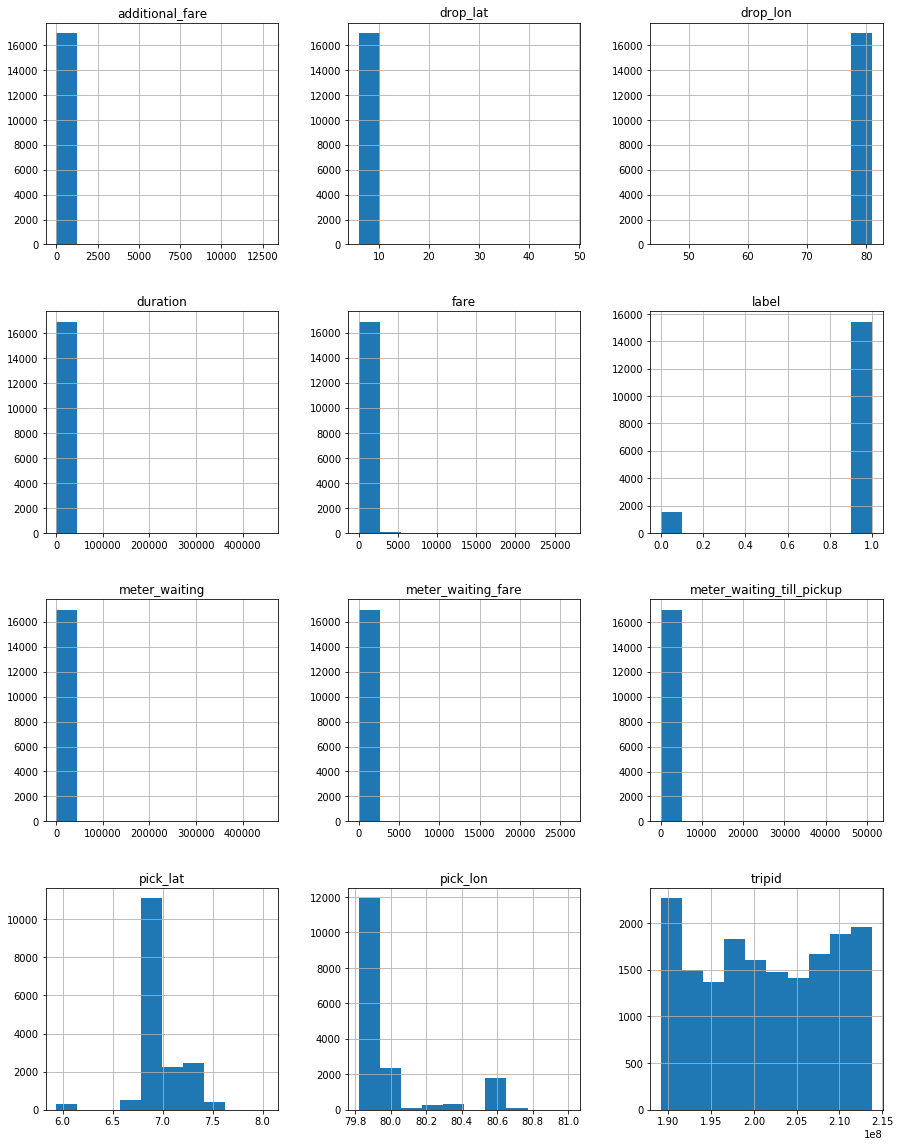

In [140]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
train_data.hist(ax=ax)

In [141]:
import math
def calculateDistance(x1, y1, x2, y2):
    x = abs(x2 - x1)
    y = abs(y2 - y1)
    return math.sqrt(x*x + y*y)

In [142]:
distanceArr = []
for index, row in train_data.iterrows():
    distance = calculateDistance(row['pick_lat'], row['pick_lon'], row['drop_lat'], row['drop_lon'])
    distanceArr.append(distance)
train_data["distance"] = distanceArr

In [143]:
distanceArr = []
for index, row in test_data.iterrows():
    distance = calculateDistance(row['pick_lat'], row['pick_lon'], row['drop_lat'], row['drop_lon'])
    distanceArr.append(distance)
test_data["distance"] = distanceArr

In [144]:
import seaborn as sns
import numpy as np
# f, ax = plt.subplots(figsize=(10, 8))
corr = train_data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#             square=True, ax=ax)

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,distance
tripid,1.00,0.02,-0.02,-0.02,-0.02,-0.02,0.03,0.03,0.01,0.03,-0.01,0.07,-0.01
additional_fare,0.02,1.00,-0.00,0.20,0.20,0.00,0.01,0.00,0.00,0.00,0.32,-0.04,-0.00
duration,-0.02,-0.00,1.00,0.97,0.97,0.04,-0.03,-0.03,-0.02,-0.01,0.87,-0.11,0.01
meter_waiting,-0.02,0.20,0.97,1.00,1.00,0.03,-0.02,-0.01,-0.01,-0.01,0.87,-0.11,0.00
meter_waiting_fare,-0.02,0.20,0.97,1.00,1.00,0.03,-0.02,-0.01,-0.01,-0.01,0.87,-0.10,0.00
meter_waiting_till_pickup,-0.02,0.00,0.04,0.03,0.03,1.00,0.01,0.02,0.01,0.01,0.05,-0.04,0.00
pick_lat,0.03,0.01,-0.03,-0.02,-0.02,0.01,1.00,0.52,0.56,0.34,-0.02,-0.03,0.01
pick_lon,0.03,0.00,-0.03,-0.01,-0.01,0.02,0.52,1.00,0.30,0.65,-0.04,-0.04,0.01
drop_lat,0.01,0.00,-0.02,-0.01,-0.01,0.01,0.56,0.30,1.00,-0.42,-0.02,-0.01,0.82
drop_lon,0.03,0.00,-0.01,-0.01,-0.01,0.01,0.34,0.65,-0.42,1.00,-0.01,-0.03,-0.74


In [145]:
y = train_data.label
y

0        1
1        1
2        1
3        1
5        1
        ..
17171    1
17172    1
17173    1
17174    1
17175    1
Name: label, Length: 16968, dtype: int64

In [146]:
# columns = list(train_data.columns)
# columns.remove("label")
columns = ['duration', 'meter_waiting',
       'meter_waiting_fare', 'meter_waiting_till_pickup', 'fare', 'distance']
X = train_data[columns]
X

,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,distance
0,834.0,56.0,0.0000,64.0,270.32,0.045869
1,791.0,47.0,0.0000,134.0,197.85,0.028500
2,1087.0,80.0,0.0000,61.0,301.64,0.057019
3,598.0,271.0,15.6638,68.0,82.30,0.007806
5,3407.0,182.0,0.0000,112.0,1065.02,0.217734
...,...,...,...,...,...,...
17171,838.0,93.0,5.4219,451.0,198.26,0.019087
17172,2151.0,428.0,0.0000,39.0,581.23,0.098307
17173,263.0,9.0,0.0000,110.0,76.20,0.009405
17174,858.0,115.0,0.0000,317.0,133.31,0.026057


In [147]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42)

In [148]:
from sklearn.model_selection import cross_val_score

In [149]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
# model.fit(X_train, y_train)

In [150]:
# y_pred = model.predict(X_test)
# y_pred

In [151]:
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, y_pred)
scores = cross_val_score(model, X, y, cv=10)
scores

array([0.96228639, 0.95167943, 0.94991161, 0.96051856, 0.95639364,
       0.94873306, 0.94932233, 0.94814378, 0.94693396, 0.94221698])

In [152]:
accuracies = list(scores)
sum(accuracies)/len(scores)

0.9516139747167587

[2 3 1 5 4 0]


Text(0.5, 0, 'Relative Importance')

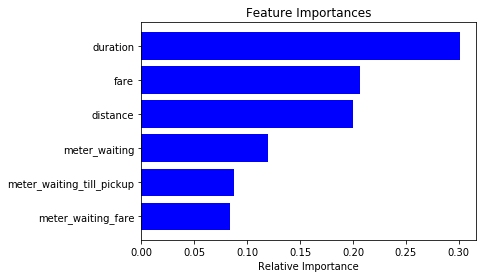

In [153]:
model.fit(X, y)
features=X.columns
importances = model.feature_importances_
indices = np.argsort(importances)
print(indices)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

# Train and Predict for Submission

In [154]:
model = RandomForestClassifier(random_state=0)
model.fit(X, y)

RandomForestClassifier(random_state=0)

In [155]:
test = test_data[columns]
prediction = model.predict(test)
prediction

array([1, 0, 1, ..., 1, 1, 1])

In [157]:
submission = pd.DataFrame()
submission['tripid'] = test_data['tripid']
submission['prediction'] = prediction

In [158]:
submission.head()

,tripid,prediction
0,213284604,1
1,213286352,0
2,213293973,1
3,213294622,1
4,213298687,1


In [159]:
submission.to_csv("submission.csv", index=False)